# Introduction to Clustering and Dimensionality Reduction

**Clustering** is an **unsupervised learning** method that groups similar data points based on feature similarity, rather than relying on labels. It helps uncover hidden patterns in data.

**Why is it useful?**
- Discover customer segments in marketing data  
- Detect anomalies in network traffic or IoT data  
- Compress images by grouping similar colors  
- Identify disease subtypes in healthcare  
- Cluster news articles by topic  

In this notebook:
1. Overview of clustering methods  
2. Overview of dimensionality reduction  
3. An interactive demo: K-means on a toy dataset  
4. Metrics to evaluate clustering results  


## Methods Covered

### Clustering Algorithms
- **K-means**  
  Partitions data into \(k\) clusters by minimizing within-cluster variance.
- **Hierarchical Clustering**  
  Builds nested clusters via agglomerative or divisive linkage.
- **DBSCAN (Density-Based)**  
  Finds clusters of arbitrary shape and identifies noise.

### Dimensionality Reduction
- **PCA (Principal Component Analysis)**  
  Linearly projects data into directions that maximize variance.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  
  Non-linear technique optimized for visual separation in low-D.

### Evaluation Metrics
- **Silhouette Score** (−1 to 1): compactness vs separation  
- **Davies–Bouldin Index**: average distance ratio of clusters  
- **Visual Inspection**: critical for clustering quality


Let's start with a hands-on demo using **k-means** on a synthetic dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# sns.set(style="whitegrid", palette="muted", font_scale=1.2)


## Generate synthetic data

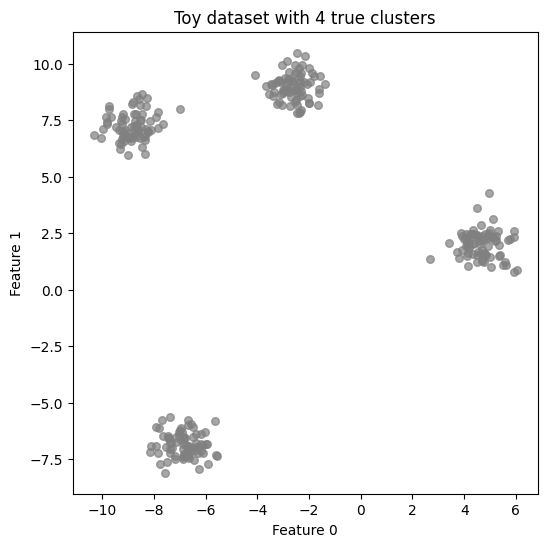

In [2]:

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, color='grey', alpha=0.7)
plt.title("Toy dataset with 4 true clusters")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


## How K-Means Clustering Works

K-Means is a centroid-based clustering algorithm that partitions the dataset into \(k\) clusters.

### Steps:
1. **Initialisation**: Randomly place \(k\) centroids in the feature space.
2. **Assignment**: Each data point is assigned to the nearest centroid, forming clusters.
3. **Update**: New centroids are computed as the mean of all points in each cluster.
4. **Repeat**: Assignment and update steps repeat until centroids stabilise or a maximum number of iterations is reached.

The algorithm aims to **minimise the total within-cluster sum of squares** (inertia), i.e., the variance within each cluster.

K-Means works well for convex, isotropic clusters but struggles with non-spherical or unevenly sized groups.


## Clustering Evaluation Metrics

To assess clustering quality, we use a combination of numerical metrics and visual inspection. These metrics rely on **Euclidean distance** (Cartesian distance) to measure intra-cluster compactness and inter-cluster separation.

### 📏 Silhouette Score

The **silhouette score** measures how well each point fits within its cluster compared to other clusters.

To compute a **single silhouette score** for the entire clustering result, we take the **average silhouette score across all data points**:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s_i
$$

where:
- $n$ is the total number of samples,
- $s_i$ is the silhouette score for point $i$, calculated as:

$$
s_i = \frac{b_i - a_i}{\max(a_i, b_i)}
$$

---

### 🔹 What are $a_i$ and $b_i$?

- **$a_i$** = average distance from point $i$ to all **other points in the same cluster**  
  → Measures how **tightly clustered** the point is with its own group (intra-cluster cohesion).

- **$b_i$** = average distance from point $i$ to all points in the **nearest different cluster**  
  → Measures how **far away** the point is from the **closest alternative cluster** (inter-cluster separation).

---

### 📊 Interpreting the Score

- $S \approx 1$: Points are well-clustered and clearly separated.
- $S \approx 0$: Points lie between clusters — ambiguous assignment.
- $S < 0$: Points may be **misclassified**, closer to another cluster than their own.

---

The silhouette score provides both a **quantitative** and **intuitive** measure of clustering quality.


### Davies–Bouldin Index

The DB index evaluates the average **similarity** between each cluster and its most similar one, where similarity is the ratio of intra-cluster dispersion to inter-cluster distance. It is computed as:

$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$

where:
- $\sigma_i$ = average distance of all points in cluster $i$ to its centroid $c_i$
- $d(c_i, c_j)$ = Euclidean distance between centroids $c_i$ and $c_j$

- **Lower is better**
- A DB index less than 1 usually implies well-separated clusters


### Visual Inspection

Plots of clustered data remain invaluable:
- Reveal the shape, overlap, and structure of clusters
- Help verify metric results and uncover edge cases
- Especially useful when dimensionality is reduced (e.g., with PCA or t-SNE)

**Conclusion**: No single metric is sufficient on its own. Use a combination of quantitative scores and visual checks for a robust understanding of clustering performance.


In [3]:

results = [] 
ks = [2, 3, 4, 5, 6]

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    results.append((k, sil, db))

# Show results
df = pd.DataFrame(results, columns=["k", "Silhouette", "Davies-Bouldin"])
df


,k,Silhouette,Davies-Bouldin
0,2,0.615485,0.483750
1,3,0.799280,0.312296
2,4,0.875647,0.173674
3,5,0.731072,0.587863
4,6,0.585323,0.844187


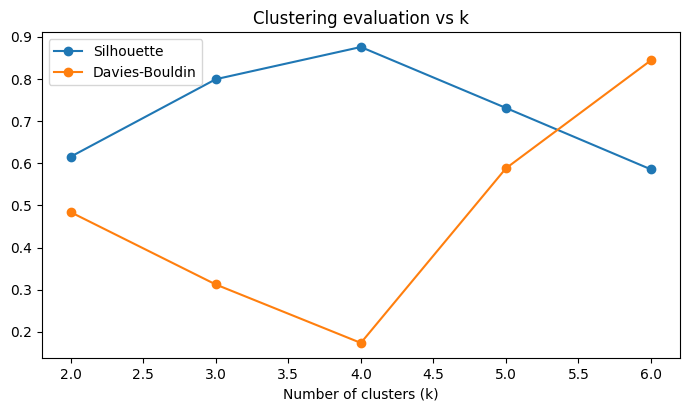

In [4]:
# Plot results
fig, ax1 = plt.subplots(figsize=(7, 4))
ax1.plot(df.k, df.Silhouette, marker='o', label='Silhouette')
ax1.plot(df.k, df["Davies-Bouldin"], marker='o', label='Davies-Bouldin')

ax1.set_xlabel("Number of clusters (k)")
fig.tight_layout()
plt.title("Clustering evaluation vs k")
plt.legend()
plt.show()


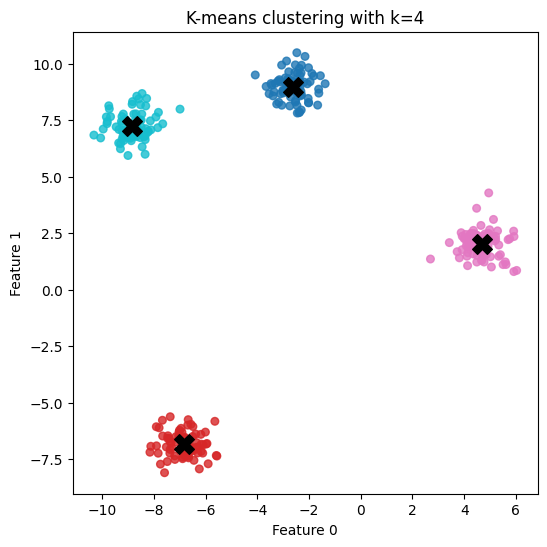

In [5]:
best_k = 4
km4 = KMeans(n_clusters=best_k, random_state=42)
labels4 = km4.fit_predict(X)
centroids = km4.cluster_centers_

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels4, s=30, cmap='tab10', alpha=0.8)
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='black', marker='X')
plt.title("K-means clustering with k=4")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


### 🧐 Interpretation

Let’s break down what each evaluation metric tells us:

- **Silhouette Score**: A score ≥ 0.5 typically suggests well-separated, compact clusters. Here, the silhouette score peaks at \(k = 4\), suggesting it's a strong candidate for the correct number of clusters.

- **Davies–Bouldin Index**: Lower values indicate better clustering. At \(k = 4\), the DB index is at its minimum, meaning the clusters are more distinct from one another and internally tight.

- **Visual Inspection**: When plotted, the clusters at \(k = 4\) appear well-formed and evenly separated. Visual inspection validates the metrics and helps catch edge cases where automated scores might be misleading.

All metrics point to \(k = 4\) as the optimal choice for this dataset, confirming that the clustering structure is meaningful and the method performed well.


## Visualising the Final Clustering Result (k = 4)

Based on our evaluation metrics, we identified **k = 4** as the best number of clusters. In this step, we re-fit the K-Means model using `k = 4` and visualise the resulting clusters.

Each point is coloured according to its assigned cluster, and the **cluster centroids** are shown as large black "X" markers. This plot helps us visually confirm whether the clusters are:
- Well-separated
- Roughly equal in size
- Centered around meaningful centroids

It's a simple but powerful way to interpret and validate clustering results.


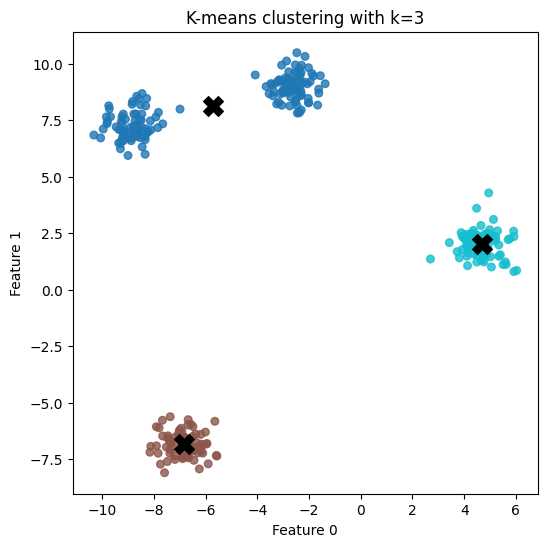

In [6]:
best_k = 3
km4 = KMeans(n_clusters=best_k, random_state=42)
labels4 = km4.fit_predict(X)
centroids = km4.cluster_centers_

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels4, s=30, cmap='tab10', alpha=0.8)
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='black', marker='X')
plt.title("K-means clustering with k=3")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()
